In [10]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import re
import random

In [15]:
!rm -rf dataset/*
!mkdir -p dataset/train/ready dataset/train/small
!mkdir -p dataset/test/ready dataset/test/small

SUBIMAGES = np.array([
  # x_min, x_max, y_min, y_max
  [ 0, 250, 20, 400 ],
  [ 250, 500, 20, 400 ],
  [ 500, 750, 20, 400 ],
  [ 750, 1100, 20, 400 ],
  [ 1100, 1350, 20, 400 ],
  [ 1350, 1600, 20, 400 ],

  [ 0, 200, 400, 700 ],
  [ 200, 500, 400, 700 ],
  [ 500, 750, 400, 700 ],
  [ 750, 1100, 400, 700 ],
  [ 1100, 1350, 400, 700 ],
  [ 1350, 1600, 400, 700 ],

  [ 0, 250, 700, 1100 ],
  [ 250, 500, 700, 1100 ],
  [ 500, 750, 700, 1100 ],
  [ 750, 1100, 700, 1100 ],
  [ 1100, 1350, 700, 1100 ],
  [ 1350, 1600, 700, 1100 ],
])

for img_path in glob('raw_dataset/*.jpg'):
    img = cv2.imread(img_path)
    if img.shape[0] < 1000:
        continue

    idx = re.findall(r'graph([0-9]*)\.jpg', img_path)
    if len(idx) > 0 and int(idx[0]) >= 1551175205:
        # Category
        category = ''
        if int(idx[0]) < 1552341605:
            category = 'small'
        elif int(idx[0]) > 1552719605:
            category = 'ready'
        else:
            continue
        
        # Test/Train
        testtrain = 'test' if random.random() <= 0.1 else 'train'
        
        idx = idx[0]
        for i, (x_min, x_max, y_min, y_max) in enumerate(SUBIMAGES):
            subimg = img[y_min:y_max, x_min:x_max]
            cv2.imwrite(f'dataset/{testtrain}/{category}/{i}_{idx}.jpg', subimg)

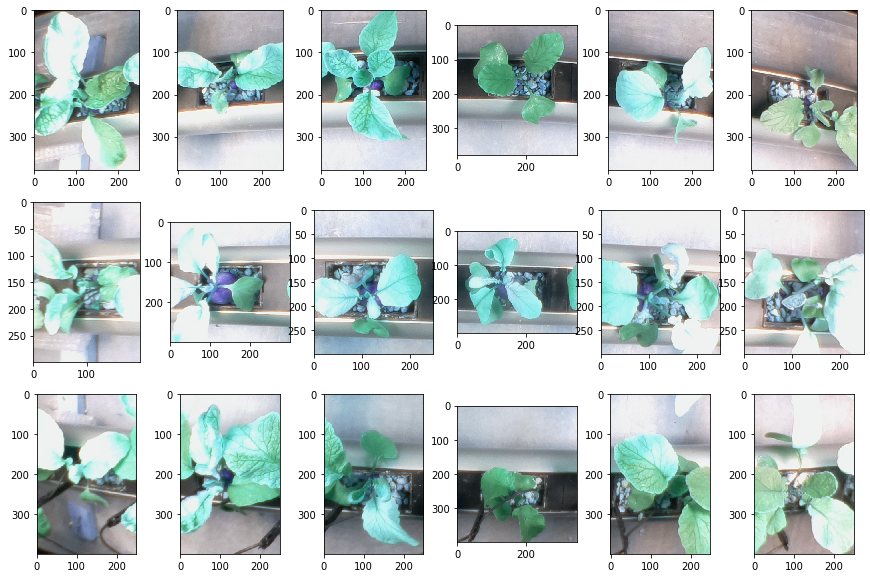

In [18]:
# Show the last image
fig, ax = plt.subplots(len(SUBIMAGES) // 6, len(SUBIMAGES) // 3, figsize=(15, 10))
for i, (x_min, x_max, y_min, y_max) in enumerate(SUBIMAGES):
    subimg = img[y_min:y_max, x_min:x_max]
    ax[i // 6, i % 6].imshow(subimg)